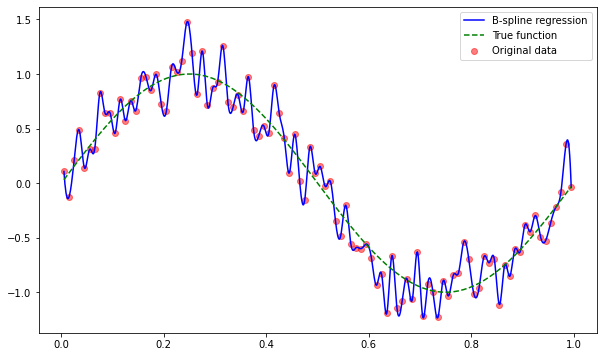

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 定义测试数据集
n = 100
x = (np.arange(1, n + 1) - 0.5) / n
m = np.sin(2 * np.pi * x)
sig = 0.2
eps = np.random.normal(scale=sig, size=x.shape)
y = m + eps

# 设置B样条的阶数和平滑参数
degree = 3

# 构建B样条曲线
bspline = make_interp_spline(x, y, k=degree)

# 在更细的网格上评估B样条曲线
x_new = np.linspace(x.min(), x.max(), 1000)
y_new = bspline(x_new)

# 绘制原始数据和B样条曲线
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original data', color='red', alpha=0.5)
plt.plot(x_new, y_new, label='B-spline regression', color='blue')
plt.plot(x, m, label='True function', color='green', linestyle='--')
plt.legend()
plt.show()



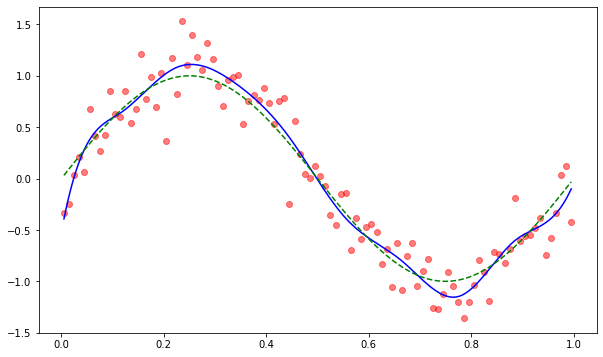

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LSQUnivariateSpline

# 定义测试数据集
n = 100
x = (np.arange(1, n + 1) - 0.5) / n
m = np.sin(2 * np.pi * x)
sig = 0.2
eps = np.random.normal(scale=sig, size=x.shape)
y = m + eps

# 设置B样条的阶数
degree = 3
knots_num = 10
# 选择节点序列，这里我们简单地选择一些等间隔的节点
knots = np.linspace(x.min(), x.max(), knots_num)[1:-1]

# 构建B样条平滑曲线
bspline_smooth = LSQUnivariateSpline(x, y, knots, k=degree)

# 在更细的网格上评估B样条曲线
x_new = np.linspace(x.min(), x.max(), 1000)
y_smooth = bspline_smooth(x_new)

# 绘制原始数据和B样条平滑曲线
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original data', color='red', alpha=0.5)
plt.plot(x_new, y_smooth, label='B-spline smoothing', color='blue')
plt.plot(x, m, label='True function', color='green', linestyle='--')
#plt.legend()
plt.savefig("pictures_bspline/data_gen.png",transparent = True)
plt.show()



In [2]:
import numpy as np
from scipy.interpolate import LSQUnivariateSpline

# 定义数据集
n = 100
x = (np.arange(1, n + 1) - 0.5) / n
m = np.sin(2 * np.pi * x)
sig = 0.2
eps = np.random.normal(scale=sig, size=x.shape)
y = m + eps

# 设置B样条的阶数
degree = 3

# 选择节点序列，这里我们简单地选择一些等间隔的节点
knots = np.linspace(x.min(), x.max(), 25)[1:-1]

# 构建B样条平滑曲线
bspline_smooth = LSQUnivariateSpline(x, y, knots, k=degree)

# 指定感兴趣的点
target_x = 0.5

# 找到离目标点最近的数据点的索引
closest_index = np.argmin(np.abs(x - target_x))

# 选择周围 20 个点的索引范围
start_index = max(0, closest_index - 20)
end_index = min(len(x), closest_index + 20)

# 计算拟合曲线在目标点的值
fitted_value_at_target_x = bspline_smooth(target_x)

# 计算每个周围点对目标点拟合值的贡献
contributions = []
for i in range(start_index, end_index):
    # 修改当前点的 y 值，其他保持不变
    y_modified = y.copy()
    y_modified[i] += 0.0001  # 给 y[i] 加一个小的扰动

    # 用修改后的数据重新拟合
    bspline_modified = LSQUnivariateSpline(x, y_modified, knots, k=degree)

    # 计算拟合值的变化
    delta_fitted_value = bspline_modified(target_x) - fitted_value_at_target_x

    # 计算当前点的贡献
    contribution = delta_fitted_value / 0.0001
    contributions.append((x[i], contribution))


# 打印周围 20 个数据点在指定点处的贡献权重
print(f"Contribution weights at target x = {target_x} for surrounding 20 points:")
for x_val, weight in contributions:
    print(f"Data point x = {x_val} contributes {weight}")


Contribution weights at target x = 0.5 for surrounding 20 points:
Data point x = 0.295 contributes -0.004156981872338594
Data point x = 0.305 contributes 0.0006354977299949383
Data point x = 0.315 contributes 0.006385174828038576
Data point x = 0.325 contributes 0.0100152557783173
Data point x = 0.335 contributes 0.008448946939854096
Data point x = 0.345 contributes 8.740495327508313e-05
Data point x = 0.355 contributes -0.01075641238745817
Data point x = 0.365 contributes -0.01829159700456051
Data point x = 0.375 contributes -0.01672724081774879
Data point x = 0.385 contributes -0.0021656272830572476
Data point x = 0.395 contributes 0.01823538394063462
Data point x = 0.405 contributes 0.03331628928182617
Data point x = 0.415 contributes 0.03191206565889004
Data point x = 0.425 contributes 0.005290515476819024
Data point x = 0.435 contributes -0.03410596667141608
Data point x = 0.445 contributes -0.06293232383824954
Data point x = 0.455 contributes -0.057753394424597815
Data point x = 

In [3]:
contributions

[(0.295, -0.004156981872338594),
 (0.305, 0.0006354977299949383),
 (0.315, 0.006385174828038576),
 (0.325, 0.0100152557783173),
 (0.335, 0.008448946939854096),
 (0.345, 8.740495327508313e-05),
 (0.355, -0.01075641238745817),
 (0.365, -0.01829159700456051),
 (0.375, -0.01672724081774879),
 (0.385, -0.0021656272830572476),
 (0.395, 0.01823538394063462),
 (0.405, 0.03331628928182617),
 (0.415, 0.03191206565889004),
 (0.425, 0.005290515476819024),
 (0.435, -0.03410596667141608),
 (0.445, -0.06293232383824954),
 (0.455, -0.057753394424597815),
 (0.465, 0.0023514614255759625),
 (0.475, 0.10416573645311011),
 (0.485, 0.2098708427156204),
 (0.495, 0.2811050555706629),
 (0.505, 0.281105055571218),
 (0.515, 0.2098708427161755),
 (0.525, 0.10416573645366523),
 (0.535, 0.0023514614255759625),
 (0.545, -0.05775339442543048),
 (0.555, -0.06293232383741687),
 (0.565, -0.034105966670305854),
 (0.575, 0.005290515477929247),
 (0.585, 0.031912065659445155),
 (0.595, 0.033316289282381284),
 (0.605, 0.0182

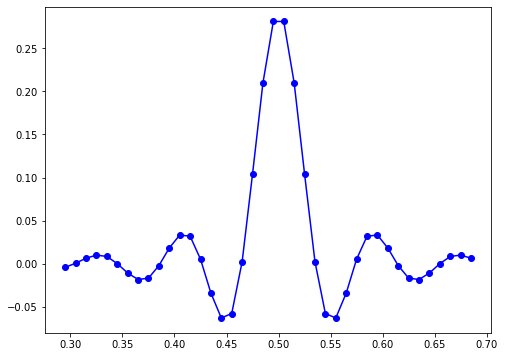

In [8]:
import matplotlib.pyplot as plt
x_vals, y_vals = zip(*contributions)

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='b')
plt.savefig("pictures_bspline/contribution.png",transparent = True)


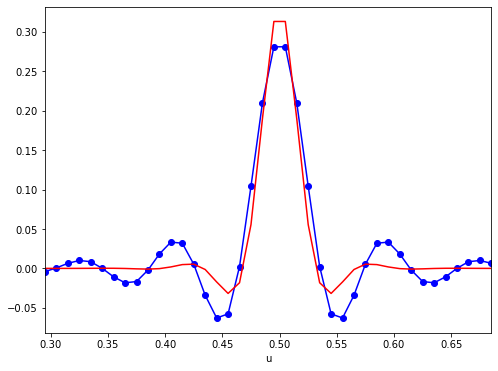

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to plot
def func(u):
    return (1/6) * (np.exp(-np.abs(u)) + 2 * np.exp(-np.abs(u) / 2) * np.sin(np.pi/6 + np.sqrt(3) * np.abs(u) / 2))
#20knots
# Create an array of u values
u = np.linspace(min(x_vals),max(x_vals), len(x_vals))
h = 0.01
x = 0.5
s = 0.01
# Compute the function values
y = s* func((x-u)/h)/h
x_vals, y_vals = zip(*contributions)

plt.figure(figsize=(8, 6))
plt.xlim(min(x_vals),max(x_vals))
# 绘图
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='b')

plt.plot(u, y, color = 'red',label=r'$\frac{1}{6} \left( e^{-|u|} + 2e^{-\frac{|u|}{2}}\sin\left(\frac{\pi}{6} + \sqrt{3} \frac{|u|}{2}\right) \right)$')
#plt.title('Plot of the given function')
plt.xlabel('u')
#plt.ylabel('Function value')
#plt.legend()
plt.savefig("pictures_bspline/fit.png",transparent = True)
plt.show()


<ipython-input-18-5d7375f3eed6>:78: RuntimeWarning: divide by zero encountered in true_divide
  weights = s * weight_function((target_x - u) / h) / h
<ipython-input-18-5d7375f3eed6>:21: RuntimeWarning: invalid value encountered in sin
  return (1/6) * (np.exp(-np.abs(u)) + 2 * np.exp(-np.abs(u) / 2) * np.sin(np.pi/6 + np.sqrt(3) * np.abs(u) / 2))


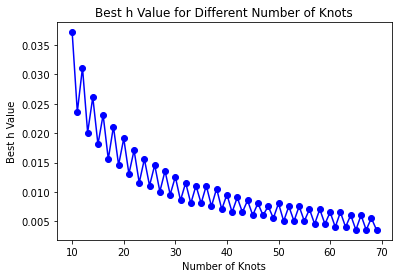

In [18]:
import numpy as np
from scipy.interpolate import LSQUnivariateSpline
import matplotlib.pyplot as plt

# 定义数据集
n = 100
x_data = (np.arange(1, n + 1) - 0.5) / n
m = np.sin(2 * np.pi * x_data)
sig = 0.2
eps = np.random.normal(scale=sig, size=x_data.shape)
y_data = m + eps

# 设置B样条的阶数
degree = 3

# 指定感兴趣的点
target_x = 0.5

# 定义权重生成函数
def weight_function(u):
    return (1/6) * (np.exp(-np.abs(u)) + 2 * np.exp(-np.abs(u) / 2) * np.sin(np.pi/6 + np.sqrt(3) * np.abs(u) / 2))

# 初始化搜索范围和参数
h_values = np.linspace(0.001, 0.1, 100)

# 为了避免性能问题，我们将只尝试每个参数的10个值
h_values = np.linspace(0, 0.1, 200)
s_values = np.linspace(0, 0.1, 20) # 假定一个固定的s值

# 准备绘制h值随knot数量变化的曲线
knot_ranges = np.arange(10, 70, 1)
best_hs = []

# 对不同数量的knots进行循环
for num_knots in knot_ranges:
    # 生成knots
    knots = np.linspace(x_data.min(), x_data.max(), num_knots + 2)[1:-1]
    # 构建B样条平滑曲线
    bspline_smooth = LSQUnivariateSpline(x_data, y_data, knots, k=degree)
    # 找到离目标点最近的数据点的索引
    closest_index = np.argmin(np.abs(x_data - target_x))

    # 选择周围 20 个点的索引范围
    start_index = max(0, closest_index - 20)
    end_index = min(len(x_data), closest_index + 20)

    # 计算拟合曲线在目标点的值
    fitted_value_at_target_x = bspline_smooth(target_x)

    # 计算每个周围点对目标点拟合值的贡献
    contributions = []
    for i in range(start_index, end_index):
    # 修改当前点的 y 值，其他保持不变
        y_modified = y_data.copy()
        y_modified[i] += 0.0001  # 给 y[i] 加一个小的扰动

        # 用修改后的数据重新拟合
        bspline_modified = LSQUnivariateSpline(x_data, y_modified, knots, k=degree)

        # 计算拟合值的变化
        delta_fitted_value = bspline_modified(target_x) - fitted_value_at_target_x

        # 计算当前点的贡献
        contribution = delta_fitted_value / 0.0001
        contributions.append((x_data[i], contribution))
    x_vals, y_vals = zip(*contributions)

    # 初始化最佳参数和拟合度
    best_h = None
    best_fit = np.inf


    # 对每个h值进行测试
    for h in h_values:
        for s in s_values:
            # 计算权重
            u = np.linspace(min(x_vals),max(x_vals), len(x_vals))
            weights = s * weight_function((target_x - u) / h) / h
        
        
            #计算拟合误差
            fit_error = np.abs(weights - y_vals).mean()


            # 如果找到更好的拟合，更新参数
            if fit_error < best_fit:
                best_fit = fit_error
                best_h = h

    # 存储此数量knots对应的最佳h
    best_hs.append(best_h)

# 绘制结果
plt.plot(knot_ranges, best_hs, marker='o',color = 'blue')
plt.xlabel('Number of Knots')
plt.ylabel('Best h Value')
plt.title('Best h Value for Different Number of Knots')
plt.savefig("pictures_bspline/best h.png",transparent = True)
plt.show()


In [83]:
knot_ranges, best_hs

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
        61, 62, 63, 64, 65, 66, 67, 68, 69]),
 [0.03718592964824121,
  0.02361809045226131,
  0.031155778894472366,
  0.020100502512562818,
  0.026130653266331662,
  0.018090452261306535,
  0.02311557788944724,
  0.015577889447236183,
  0.021105527638190957,
  0.014572864321608042,
  0.019095477386934675,
  0.013065326633165831,
  0.017085427135678392,
  0.01155778894472362,
  0.015577889447236183,
  0.011055276381909548,
  0.014572864321608042,
  0.010050251256281409,
  0.0135678391959799,
  0.009547738693467337,
  0.01256281407035176,
  0.008542713567839196,
  0.01155778894472362,
  0.008040201005025126,
  0.011055276381909548,
  0.008040201005025126,
  0.011055276381909548,
  0.007537688442211056,
  0.010552763819095479,
  0.007035175879396985,
  0.0095477386

In [85]:
import numpy as np
import pandas
setattr(pandas, "Int64Index", pandas.Index)
setattr(pandas, "Float64Index", pandas.Index)

import statsmodels.api as sm

# Assuming k_values and h_values are known numpy arrays
k_values =knot_ranges  # Example k values, replace with actual values
h_values = best_hs         # Example h values, replace with actual values

# Take the logarithm of both h and k values
log_k = np.log(k_values)
log_h = np.log(h_values)

# Add a constant term (intercept) for the regression model
log_k_with_constant = sm.add_constant(log_k)

# Create the OLS regression model and fit it to the data
model = sm.OLS(log_h, log_k_with_constant)
results = model.fit()

# Print out the summary of the regression results
print(results.summary())

# The slope (coefficient of log_k) from the regression results should be close to -1/5 if the relationship holds
slope_estimate = results.params[1]
print("Estimated slope (should be close to -1/5 if the relationship holds):", slope_estimate)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     454.5
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           4.01e-29
Time:                        00:03:25   Log-Likelihood:                 14.840
No. Observations:                  60   AIC:                            -25.68
Df Residuals:                      58   BIC:                            -21.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1027      0.171     -6.466      0.0